visualize as much as possible using toy data. for gaining intuition on target prop. modeled loosely after http://playground.tensorflow.org/

Visualize...
- preimages
    - of level sets
    - of decision boundaries
    - etc
- images/kernels and their interactions

In [11]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
sys.path.append('../')

In [13]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

import targprop.datasets as ds
import targprop.operations as op

import matplotlib.cm as cm
import matplotlib as mpl

import seaborn as sns

In [14]:
mnist = ds.mnist_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## toy datasets

In [15]:
n = 500

In [16]:
Xcircs1d = ds.combine_data((ds.ball(n//3+1, d=1, r=0.45),
                            ds.annulus(n//3, d=1, r1=0.55, r2=1.45),
                            ds.annulus(n//3, d=1, r1=1.55, r2=2.45)))
Xcircs1d.outputs = np.zeros((Xcircs1d.num_examples, 2))
n1 = n//3+1
n2 = n//3
n3 = n//3

Xcircs1d.outputs[:n1,0] = 1
Xcircs1d.outputs[n1:n1+n2,1] = 1
Xcircs1d.outputs[n1+n2:,0] = 1
Xcircs1d.inputs = np.concatenate((Xcircs1d.inputs, np.zeros_like(Xcircs1d.inputs)), axis=1)

In [49]:
Xcircs1d = ds.combine_data((ds.annulus(n/4, d=1, r1=0.1, r2=0.2),
                            ds.annulus(n/4, d=1, r1=0.3, r2=0.4),
                            ds.annulus(n/4, d=1, r1=0.5, r2=0.6),
                            ds.annulus(n/4, d=1, r1=0.7, r2=0.8)))
Xcircs1d.outputs = np.zeros((Xcircs1d.num_examples, 2))
Xcircs1d.outputs[:n/4,0] = 1
Xcircs1d.outputs[n/4:2*n/4,1] = 1
Xcircs1d.outputs[2*n/4:3*n/4,0] = 1
Xcircs1d.outputs[3*n/4:4*n/4,1] = 1
Xcircs1d.inputs = np.concatenate((Xcircs1d.inputs, np.zeros_like(Xcircs1d.inputs)), axis=1)

In [17]:
Xcircs = ds.combine_data((ds.annulus(n/4, d=2, r1=0.1, r2=0.2),
                          ds.annulus(n/4, d=2, r1=0.3, r2=0.4),
                          ds.annulus(n/4, d=2, r1=0.5, r2=0.6),
                          ds.annulus(n/4, d=2, r1=0.7, r2=0.8)))
Xcircs.outputs = np.zeros_like(Xcircs.inputs)
Xcircs.outputs[:n/4,0] = 1
Xcircs.outputs[n/4:2*n/4,1] = 1
Xcircs.outputs[2*n/4:3*n/4,0] = 1
Xcircs.outputs[3*n/4:4*n/4,1] = 1

In [18]:
Xor = ds.xor_full(n)

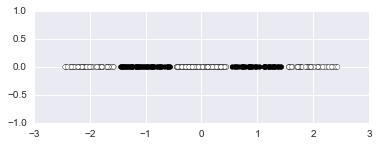

In [19]:
X = Xcircs1d
plt.scatter(X.inputs[:,0], X.inputs[:,1], c=ds.un_hotify(X.outputs))
plt.axis('square')
#plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

## model

In [20]:
import targprop.tprop_train_temp as tp
import tempfile
import shutil

dirpath = tempfile.mkdtemp()
print dirpath

from mpl_toolkits.mplot3d import Axes3D

import random

/var/folders/fx/kqfj6d7j4f96zch39j53gvd00000gn/T/tmpgPDYqw


In [21]:
# shutil.rmtree(dirpath) # to delete

In [22]:
from datetime import datetime
now = datetime.now()

In [23]:
now = datetime.now()
sim = str(now.hour)+str(now.minute)+str(now.second)
print sim

cur_params = {}
cur_params['batch_size']        = X.num_examples // 10
cur_params['gamma']             = 0.001
cur_params['alpha_t']           = 1.0
cur_params['noise_str']         = 0.01
cur_params['learning_rate']     = 0.01
cur_params['learning_rate_inv'] = 0.01

cur_params['t_steps'] = 5000
cur_params['l_dim'] = [2, 2]
cur_params['act'] = 'relu'
cur_params['mode'] = 'classification'
cur_params['dataset'] = X
cur_params['update_implementation'] = 'tf'
cur_params['SGD'] = True
cur_params['preprocess'] = False
cur_params['tb_path'] = '/tmp/targprop/'+sim

cur_params['err_alg'] = 0

17187


In [24]:
out = tp.train_net(**cur_params)

Iter:  0 Loss:  0.693904530571
Iter:  500 Loss:  0.615563715318
Iter:  1000 Loss:  0.548980039157
Iter:  1500 Loss:  0.487425586218
Iter:  2000 Loss:  0.548059004162
Iter:  2500 Loss:  0.533366827891
Iter:  3000 Loss:  0.541759125277
Iter:  3500 Loss:  0.519077656147
Iter:  4000 Loss:  0.537538006666
Iter:  4500 Loss:  0.545976716949
Iter:  5000 Loss:  0.532799509619


In [25]:
exs = np.random.permutation(range(X.num_examples))

In [26]:
def axify(ax):
  ax.axis('square')
  lims = ax.get_xlim() + ax.get_ylim()
  lims = min(lims), max(lims)
  ax.set_xlim(lims)
  ax.set_ylim(lims)
  ax.xaxis.set_ticks(np.arange(np.floor(lims[0]), np.ceil(lims[1]), 1))
  ax.yaxis.set_ticks(np.arange(np.floor(lims[0]), np.ceil(lims[1]), 1))
  ax.hlines([0], *ax.get_xlim(), linewidth=0.5, alpha=0.5)
  ax.vlines([0], *ax.get_ylim(), linewidth=0.5, alpha=0.5)


In [27]:
def plot_matcols(A, ax):
  args = {'linewidth':2, 'color':'b'}
  A = A/np.linalg.norm(A)
  if '3D' in str(ax.__class__):
    for i in range(A.shape[0]):      
      ax.plot([0, A[i,0]], [0, A[i,1]], [0, A[i, 2]], **args)
  else:
    for i in range(A.shape[0]):
      ax.plot([0, A[i,0]], [0, A[i,1]], **args)


In [28]:
def plot3d_lines(ax):
  args = {'linewidth':0.5, 'alpha':0.5}
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  zlim = ax.get_zlim()
  for i in range(3):
    ax.plot([0,0], [0,0], [-zlim, zlim], 'k', **args)
    ax.plot([0,0], [-ylim, ylim], [0,0], 'k', **args)
    ax.plot([-xlim, xlim], [0,0], [0,0], 'k', **args)


In [29]:
def get_gridlines():
  c1 = np.linspace(-40, 40, 801)
  c2 = np.linspace(-40, 40, 81)
  x1, y1 = np.meshgrid(np.append(c1, 999), c2)
  x2, y2 = np.meshgrid(np.append(c1, 999), c2)
  x1[x1==999] = None
  y1[y1==999] = None
  x2[x2==999] = None
  y2[y2==999] = None

In [30]:
def dist_to_hull(points, hull_points):
  from scipy.spatial import ConvexHull
  #inhull = in_hull(points, hull_points)
  hull = ConvexHull(hull_points)
  dists_to_edges = np.max((np.dot(hull.equations[:, :-1], points.T).T + hull.equations[:, -1]), axis=-1)

  dists_to_verts = np.inf*np.ones_like(dists_to_edges)
  for iver in hull.vertices:
    dists_to_verts = np.minimum.reduce((np.linalg.norm(hull.points[iver] - points, axis=1), dists_to_verts))

  dists = np.maximum.reduce((dists_to_edges, dists_to_verts))
  dists[dists < 0] = 0
  return dists

In [487]:
dists_to_verts = np.inf*np.ones_like(dists_to_edges)

SyntaxError: unexpected EOF while parsing (<ipython-input-488-afba2eb019e8>, line 1)

In [523]:
hull.equations

array([[-0., -1., -0.],
       [-1.,  0., -0.],
       [ 1., -0., -2.],
       [ 0.,  1., -2.]])

In [522]:
hull.volume

4.0

In [517]:
hull.simplices

array([[  200,     0],
       [40200,     0],
       [40400,   200],
       [40400, 40200]], dtype=int32)

In [505]:
from scipy.spatial import ConvexHull
points = np.copy(x_stack)
hull_p = op.relu().f(x_stack)
hull = ConvexHull(hull_p)
dists_to_edges = np.max((np.dot(hull.equations[:, :-1], points.T).T + hull.equations[:, -1]), axis=-1)

dists_to_verts = np.inf*np.ones_like(dists_to_edges)
for iver in hull.vertices:
  dists_to_verts = np.minimum.reduce((np.linalg.norm(hull.points[iver] - points, axis=1)**0.5, dists_to_verts))

dists = np.maximum.reduce((dists_to_edges, dists_to_verts))

dists[dists<0] = 0


In [433]:
from scipy.spatial import ConvexHull
points = np.copy(x_stack)
hull_p = op.relu().f(x_stack)
hull = ConvexHull(hull_p)

In [379]:
input_dim = 2
x = []
for i in range(input_dim):
  x.append(np.linspace(-2, 2, 201))
xg = np.meshgrid(*x)
x_stack = np.stack([v.flatten() for v in xg]).T

In [515]:
dists = dist_to_hull(x_stack, op.relu().f(x_stack))

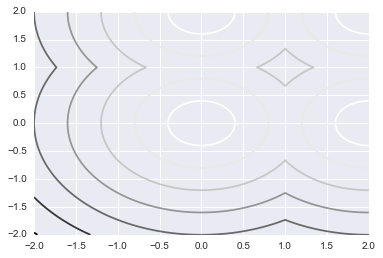

In [516]:
plt.contour(xg[0], xg[1], dists.reshape(201,201))

(-2.0, 2.0, -2.0, 2.0)

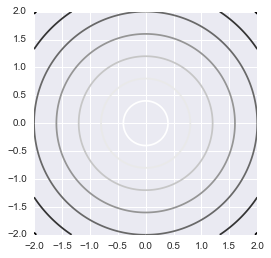

In [504]:
plt.contour(xg[0], xg[1], (np.linalg.norm(hull.points[hull.vertices[0]] - points, axis=1)).reshape(201,201))
plt.axis('square')

In [369]:
plt.plot(dist_to_hull(x_stack, y_stack))

NameError: name 'x_stack' is not defined

In [ ]:
def get_preimg(img, func, eps=0.1, input_dim=2):
  x = []
  for i in range(input_dim):
    x.append(np.linspace(-2, 2, 201))
  xg = np.meshgrid(*x)
  x_stack = np.stack(xg)

In [171]:
def get_preimg(img, func, eps=0.1):
  """ computes the preimage a of set img through func, i.e.
      img=func(a)"""
  c1 = np.linspace(-2, 2, 201)
  c2 = np.linspace(-2, 2, 201)
  x1, y1 = np.meshgrid(c1, c2)
  a = np.stack((x1.flatten(), y1.flatten()))
  d = np.zeros(a.shape[1])
  b = func(a)
  for i in range(a.shape[1]):
      d[i] = np.min(np.linalg.norm(b[:,i] - img))
  inds = d < eps
  return a[:,inds], b[:,inds]


In [245]:
def in_hull(p, hull):
  """
  Test if points in `p` are in `hull`

  `p` should be a `NxK` coordinates of `N` points in `K` dimensions
  `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
  coordinates of `M` points in `K`dimensions for which Delaunay triangulation
  will be computed
  """
  from scipy.spatial import Delaunay
  if not isinstance(hull, Delaunay):
      hull = Delaunay(hull)

  return hull.find_simplex(p)>=0

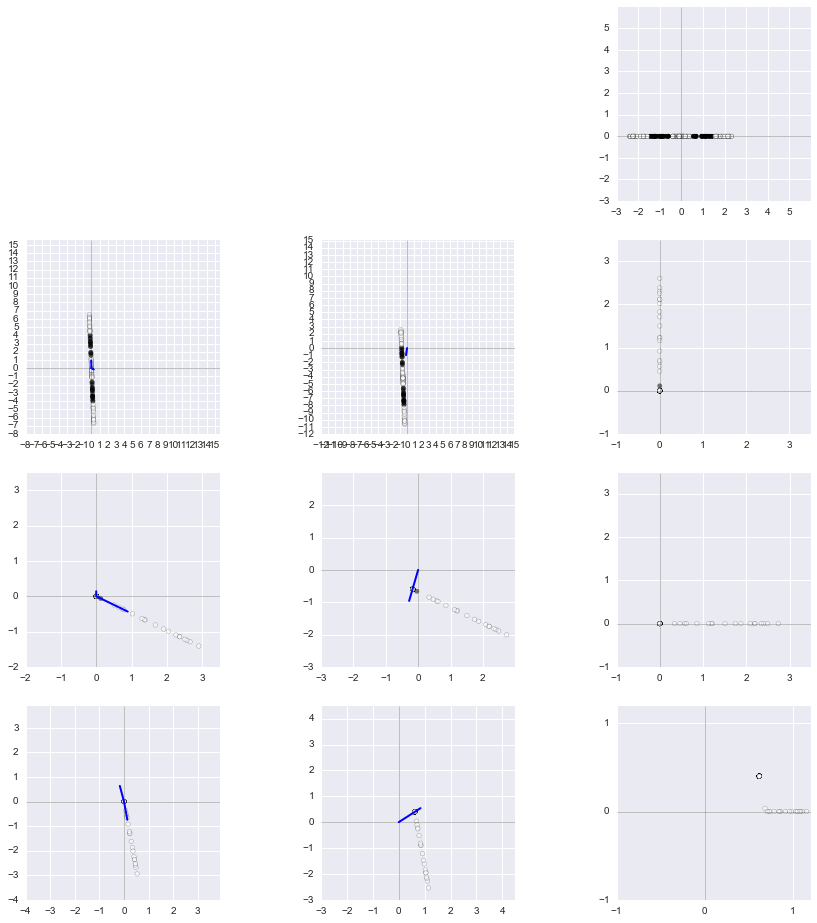

In [129]:
nrows = out['layers']
ncols = 3

fact = 5
fig = plt.figure(figsize=(fact*ncols, fact*nrows+1))

ax = []
cur = out['x'+str(3)][0]
ax.append(fig.add_subplot(nrows+1, ncols, 3))
ax[-1].scatter(cur[:,0], cur[:,1], c=ds.un_hotify(out['y']))
axify(ax[-1])

for i in range(3, nrows*ncols+3):
  l = i//3
  h = i%3+1
  cur = out['x'+str(h)][l]
  if out['l_dim'][l] > 2:
    ax.append(fig.add_subplot(nrows+1, ncols, i+1, projection='3d'))
    ax[-1].scatter(cur[:,0], cur[:,1], cur[:,2], c=ds.un_hotify(out['y']))
    ax[-1].view_init(elev=20., azim=235)
    #ax[-1].set_xlim([-1, 1])
    #ax[-1].set_ylim([-1, 1])
    #ax[-1].set_zlim([-1, 1])
    plot3d_lines(ax[-1])
  else:
    ax.append(fig.add_subplot(nrows+1, ncols, i+1))
    ax[-1].scatter(cur[:,0], cur[:,1], c=ds.un_hotify(out['y']), alpha=0.5)
    lim = max(np.abs(ax[-1].get_xlim() + ax[-1].get_ylim()))
    axify(ax[-1], lim*1.5)
  if h == 1:
    plot_matcols(out['W'][l], ax[-1])
  elif h == 2:
    plot_matcols(out['b'][l], ax[-1])